## Observations and Insights 

In [ ]:
#We can see how the study took an effort to have a even distribution of test subjects in order to find fair conclusions.
#the pie charts depicting male versus female mice have an almost equal distribution 

#From the line chart there is a clear correlation between time passed and the volume of tumors 
# as more time increases, the volume of tumors lessens 

#From the scatter plot we can see that as the mouse weight increases, the volume of tumors also increase.

In [2]:
def pt(var_name):
    print(type(var_name), var_name, sep="\n")

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_f = pd.merge(study_results,mouse_metadata, how="left", on="Mouse ID")
# Display the data table for preview
combined_f.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
mice_total = len(combined_f["Mouse ID"].unique())
mice_total

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = combined_f.loc[combined_f.duplicated(subset = ["Mouse ID","Timepoint"]),"Mouse ID"].unique()
pt(dup_mice)

<class 'numpy.ndarray'>
['g989']


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_f[combined_f["Mouse ID"]=="g989"]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_f[combined_f["Mouse ID"]!="g989"]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Checking the number of mice in the clean DataFrame.
mice_total_clean = len(clean_df["Mouse ID"].unique())
mice_total_clean

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
#pt(mean)
median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
#pt(median)
variance = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
#pt(variance)
std_dev = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
#pt(std_dev)
SEM = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
#pt(SEM)
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_df = pd.DataFrame({"Mean":mean,
                           "Median":median,
                           "Variance":variance,
                           "Standard Deviation":std_dev,
                           "SEM":SEM
                          })
summary_df

# Assemble the resulting series into a single summary dataframe.



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

summary_statistics
# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

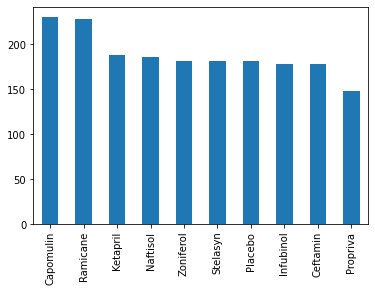

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot = clean_df["Drug Regimen"].value_counts()
bar_plot.plot(kind="bar")
plt.show()


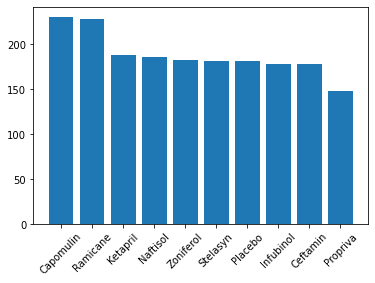

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(bar_plot.index.values,bar_plot.values)
#fix x axis
plt.xticks(rotation = 45)


plt.show()


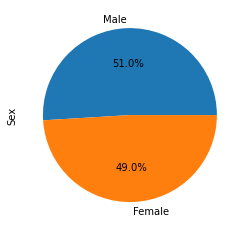

nah


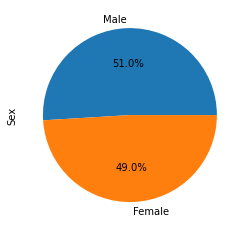

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
try:
    
    bar_plot = clean_df["Sex"].value_counts()
    bar_plot.plot(kind = "pie",autopct="%1.1f%%")
    plt.show(bar_plot)
    
except:
    print("nah")

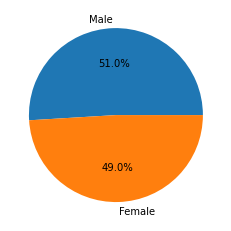

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(bar_plot.values, labels = bar_plot.index.values,autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_vol = clean_df.groupby("Mouse ID").max()["Timepoint"]
final_tumor_vol = final_tumor_vol.reset_index()
final_tumor_vol.head
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge2 = final_tumor_vol.merge(clean_df, on =["Mouse ID","Timepoint"],how = "left" )
#pt(merge2)
merge2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in treatment_list:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merge2.loc[merge2["Drug Regimen"]== i, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile-lower_quartile

    
    lower_bound = lower_quartile - (1.5*iqr)
    upper_bound = upper_quartile + (1.5*iqr)
    outlier = tumor_volume.loc[(tumor_volume < lower_bound)|(tumor_volume > upper_bound)]
    print (outlier)
    
    

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(close=None, block=None)>

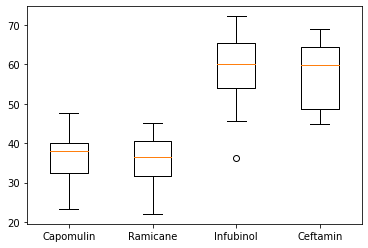

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data, labels = treatment_list )

plt.show

## Line and Scatter Plots

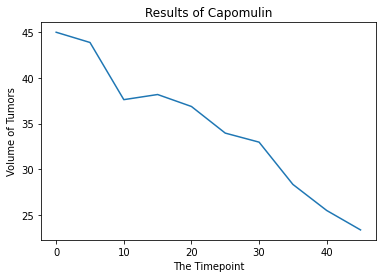

In [18]:
line_merge = study_results.loc[study_results["Mouse ID"] == "s185"]
line_merge.set_index("Mouse ID")

plt.plot(line_merge["Timepoint"], line_merge["Tumor Volume (mm3)"])

plt.xlabel("The Timepoint")
plt.ylabel("Volume of Tumors")
plt.title("Results of Capomulin")

plt.show()

#### Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot = merge2

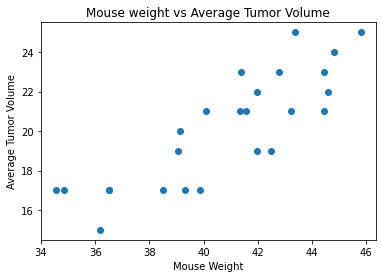

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scat_merge = combined_f.loc[(combined_f["Drug Regimen"] == "Capomulin")]
scat_merge2 = scat_merge.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = scat_merge.groupby("Mouse ID")["Weight (g)"].mean()

plt.scatter(scat_merge2 ,mouse_weight)

plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.title("Mouse weight vs Average Tumor Volume")

plt.show()


## Correlation and Regression

The correlation coefficient is 0.84


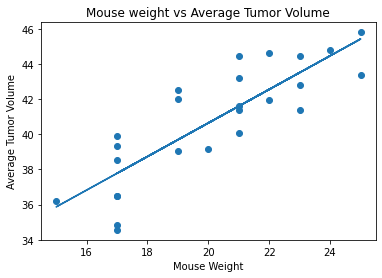

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
scat_merge = combined_f.loc[(combined_f["Drug Regimen"] == "Capomulin")]
scat_merge2 = scat_merge.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = scat_merge.groupby("Mouse ID")["Weight (g)"].mean()


# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
# x = mouse_weight
# y = scat_merge2
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, scat_merge2)
# res = st.linregress(x, y)

# plt.plot(x, y, 'o', label='original data')
# plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
# plt.legend()
# plt.show()

fit = slope * mouse_weight + intercept
correlation = st.pearsonr(mouse_weight, scat_merge2)


plt.scatter(mouse_weight ,scat_merge2)
plt.plot(mouse_weight, slope * mouse_weight + intercept)


plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.title("Mouse weight vs Average Tumor Volume")

print(f"The correlation coefficient is {round(correlation[0],2)}")

plt.show()